In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
data = {
    "sore_throat":        [1,0,1,1,0,0,0,1,0,1],
    "fever":              [1,0,1,0,1,0,0,0,1,1],
    "swollen_glands":     [1,0,0,1,0,0,1,0,0,0],
    "congestion":         [1,1,1,0,1,1,0,1,1,1],
    "headache":           [1,1,0,0,0,0,0,1,1,1],
    "diagnosis": [
        "Strep_Throat","Allergy","Cold","Strep_Throat","Cold",
        "Allergy","Strep_Throat","Allergy","Cold","Cold"
    ]
}

df = pd.DataFrame(data)


In [3]:
X = df[["sore_throat","fever","swollen_glands","congestion","headache"]]
y = df["diagnosis"]

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42
)


In [6]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [7]:
y_pred = clf.predict(X_test)

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
 [[2 0]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



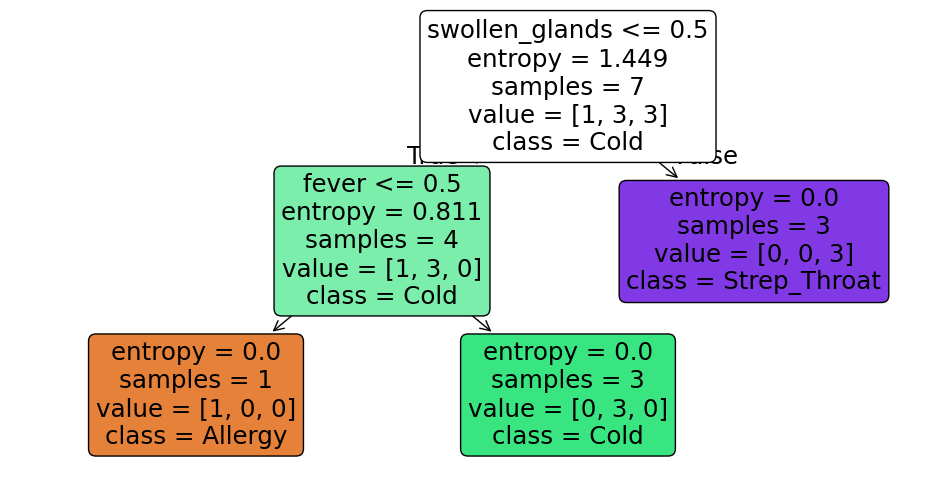

In [11]:
plt.figure(figsize=(12,6))
tree.plot_tree(
    clf,
    feature_names=X.columns,
    class_names=le.classes_,
    filled=True,
    rounded=True
)
plt.show()